In [1]:
## importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
# this is quadratic equation used  - y = 0.5*x^2 + 1.5*x + 2 + outliers

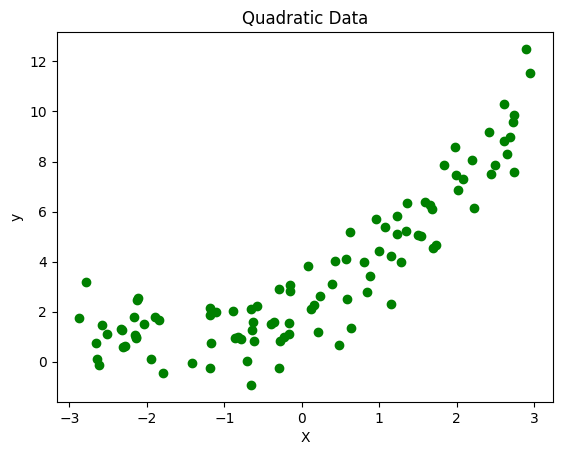

In [6]:
plt.scatter(X,y,color = 'g')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Quadratic Data')
plt.show()

In [7]:
# training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [8]:
## Let's implement the Linear Regression model
from sklearn.linear_model import LinearRegression
regression_1= LinearRegression()

In [9]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [12]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(X_test))

In [13]:
score

0.5916694362946208

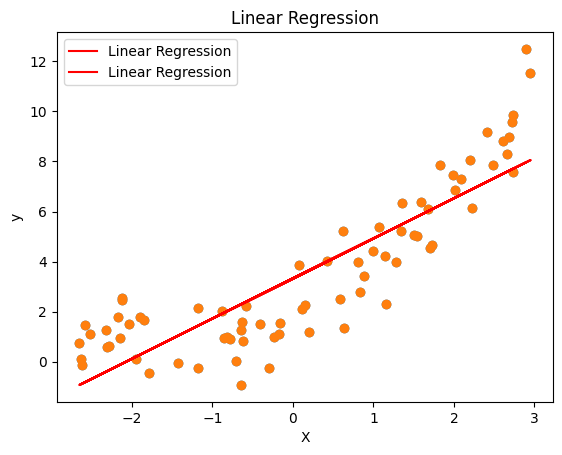

In [15]:
## lets visualize the linear regression model

plt.plot(X_train,regression_1.predict(X_train),color = 'red',label = 'Linear Regression')
plt.scatter(X_train,y_train)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [16]:
## now lets implement the polynomial regression model

from sklearn.preprocessing import PolynomialFeatures


In [18]:
poly = PolynomialFeatures(degree = 2, include_bias= True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) # transform is used because we already fitted the model and we dont want to again create all the features again. and we dont want to know the features of the information wrt my data.

In [19]:
X_train_poly

array([[ 1.00000000e+00,  2.65346355e+00,  7.04086882e+00],
       [ 1.00000000e+00, -5.79716039e-01,  3.36070686e-01],
       [ 1.00000000e+00,  1.34848517e+00,  1.81841226e+00],
       [ 1.00000000e+00,  2.68751462e+00,  7.22273483e+00],
       [ 1.00000000e+00, -2.14272636e+00,  4.59127625e+00],
       [ 1.00000000e+00, -1.89961052e+00,  3.60852013e+00],
       [ 1.00000000e+00, -4.03717518e-01,  1.62987835e-01],
       [ 1.00000000e+00, -7.86936200e-01,  6.19268583e-01],
       [ 1.00000000e+00, -1.84746112e+00,  3.41311259e+00],
       [ 1.00000000e+00, -8.60745712e-01,  7.40883180e-01],
       [ 1.00000000e+00, -2.11617959e+00,  4.47821604e+00],
       [ 1.00000000e+00, -1.61922056e-01,  2.62187523e-02],
       [ 1.00000000e+00,  9.94332883e-01,  9.88697883e-01],
       [ 1.00000000e+00,  6.25039664e-01,  3.90674582e-01],
       [ 1.00000000e+00, -6.50436955e-01,  4.23068233e-01],
       [ 1.00000000e+00,  2.94926381e+00,  8.69815700e+00],
       [ 1.00000000e+00,  2.04541164e-01

In [21]:
X_test_poly

array([[ 1.        ,  1.65198974,  2.7290701 ],
       [ 1.        ,  0.96289256,  0.92716208],
       [ 1.        , -2.32787893,  5.41902031],
       [ 1.        ,  0.23265874,  0.05413009],
       [ 1.        , -0.1475611 ,  0.02177428],
       [ 1.        , -2.14017198,  4.58033609],
       [ 1.        , -2.78138667,  7.73611179],
       [ 1.        , -2.86915209,  8.23203371],
       [ 1.        , -1.18870971,  1.41303078],
       [ 1.        , -0.35480993,  0.12589009],
       [ 1.        , -0.15165376,  0.02299886],
       [ 1.        , -0.27968987,  0.07822642],
       [ 1.        ,  2.43523119,  5.93035094],
       [ 1.        , -1.11279499,  1.23831269],
       [ 1.        ,  1.97553081,  3.90272198],
       [ 1.        , -0.29969985,  0.08982   ],
       [ 1.        , -1.16745043,  1.3629405 ],
       [ 1.        ,  1.22647812,  1.50424858],
       [ 1.        ,  1.22515311,  1.50100014],
       [ 1.        ,  0.47526319,  0.2258751 ],
       [ 1.        , -0.65003437,  0.422

In [23]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
score

0.8153262513383784

In [24]:
print(regression.intercept_)

[1.90081108]


In [25]:
print(regression.coef_)

[[0.         1.50852319 0.48081901]]


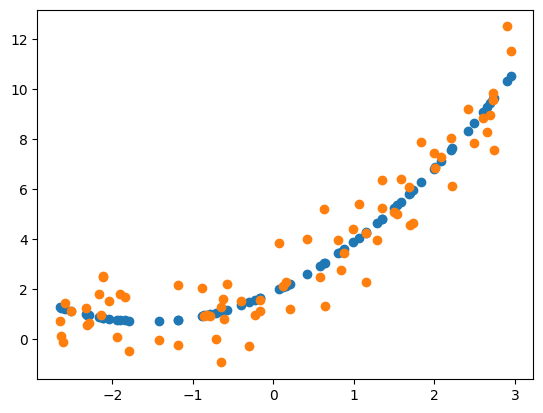

In [27]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)
plt.show()

In [28]:
## lets make degree = 3 polynomial regression model
poly = PolynomialFeatures(degree = 3, include_bias= True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) # transform is used because we already fitted the model and we dont want to again create all the features again. and we dont want to know the features of the information wrt my data.

In [29]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
score

0.8108953555851477

In [31]:
## prediction of new data

X_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(X_new)
x_new_poly


array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

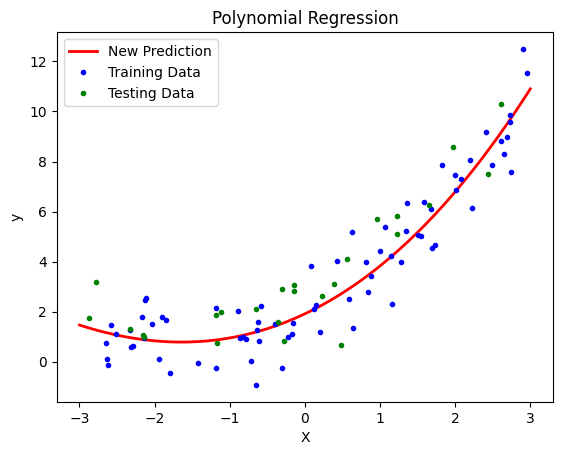

In [33]:
y_pred = regression.predict(x_new_poly)
plt.plot(X_new,y_pred,"r-", linewidth=2, label = "New Prediction")
plt.plot(X_train,y_train,"b.",label = "Training Data")
plt.plot(X_test,y_test,"g.",label = "Testing Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

## Pipeline Concepts

In [34]:
from sklearn.pipeline import Pipeline

In [44]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)

    poly_features = PolynomialFeatures(degree = degree, include_bias= True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([("poly_features",poly_features),
                                ("lin_reg",lin_reg)])
    poly_regression.fit(X_train,y_train) ## it is creating polynomial features and then fitting the model by linear regression
    y_pred_new = poly_regression.predict(X_new) 

    #Plotting the graph
    plt.plot(X_new, y_pred_new,'r',label = "Degree " + str(degree), linewidth = 3)
    plt.plot(X_train,y_train,"b.",label = "Training Data", linewidth = 3)
    plt.plot(X_test,y_test,"g.",label = "Testing Data", linewidth = 3)
    plt.xlabel("X") 
    plt.ylabel("y")
    plt.title("Polynomial Regression")
    plt.legend(loc = "upper left")
    plt.axis([-4,4,0,10])
    plt.show()


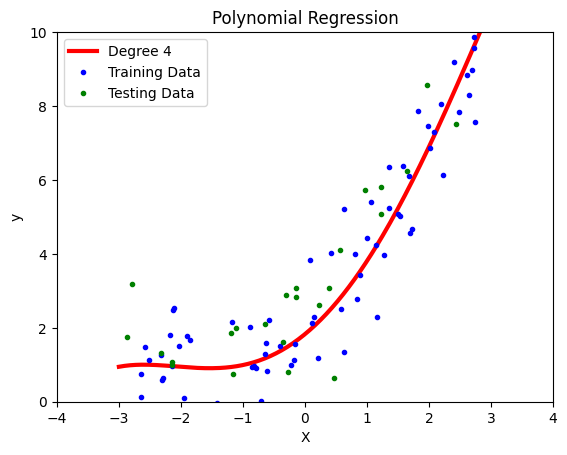

In [45]:
poly_regression(4)